In [2]:
from qiskit import *

In [3]:
circuit = QuantumCircuit(3, 3)

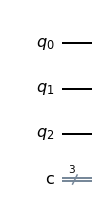

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

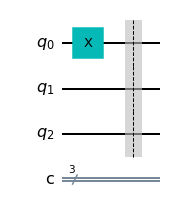

In [5]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

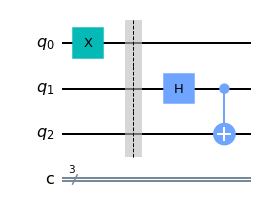

In [6]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

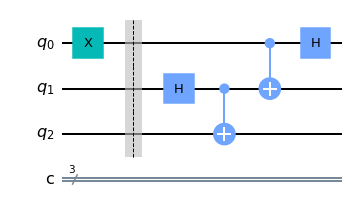

In [7]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

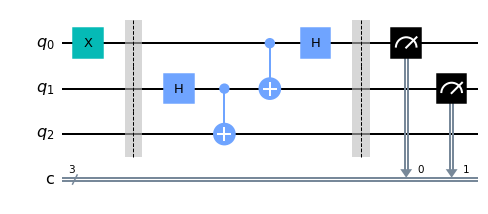

In [8]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

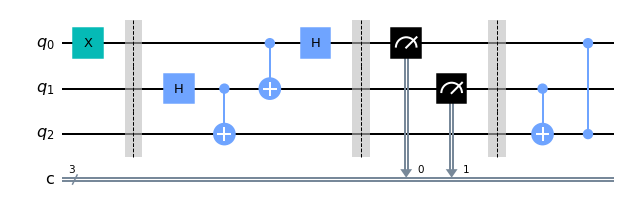

In [9]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

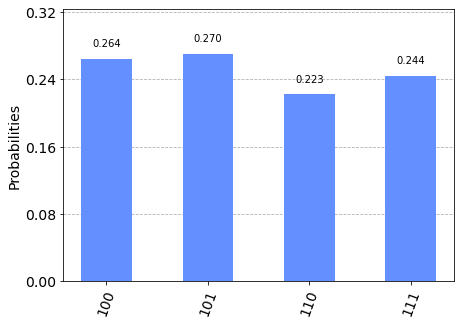

In [10]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


In [11]:
print(counts)

{'111': 250, '110': 228, '100': 270, '101': 276}


In [12]:
# Results

# State in q0 teleported to state in q2
# Entaglement

In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
# This line will list quantum computers to select from

provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
print(f"Queue of {backend.name()} : {backend.status().pending_jobs} and has {qubit_count} qubits.")

Queue of ibmq_manila : 17 and has 5 qubits.


In [15]:
qteleportation = provider.get_backend('ibmq_manila')

In [16]:
job = execute(circuit,backend=qteleportation)

In [17]:
from qiskit.tools.monitor import job_monitor

In [18]:
job_monitor(job)

Job Status: job has successfully run


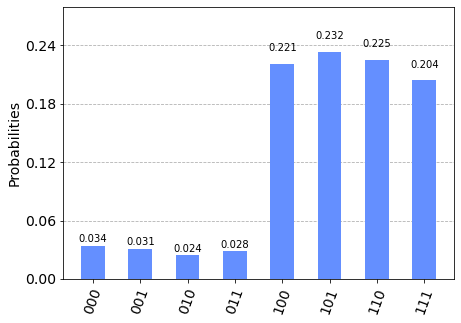

In [19]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
# 